<a href="https://colab.research.google.com/github/patil-om-3012/Concrete_compressive_strength/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns

In [7]:
data = pd.read_csv('Concrete_Data.csv')

In [8]:
X = data.drop('Concrete_compressive_strength', axis=1)
y = data['Concrete_compressive_strength']


# Exploratory Data Analysis


In [30]:
data.head()

,Cement,Blast_furnace_slag,Fly_ash,Water,Superplasticizer,Coarse_aggregate,Fine_aggregate,Age,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [31]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast_furnace_slag             1030 non-null   float64
 2   Fly_ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse_aggregate               1030 non-null   float64
 6   Fine_aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None
            Cement  Blast_furnace_slag      Fly_ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    

In [32]:
print(data.isnull().sum())

Cement                           0
Blast_furnace_slag               0
Fly_ash                          0
Water                            0
Superplasticizer                 0
Coarse_aggregate                 0
Fine_aggregate                   0
Age                              0
Concrete_compressive_strength    0
dtype: int64


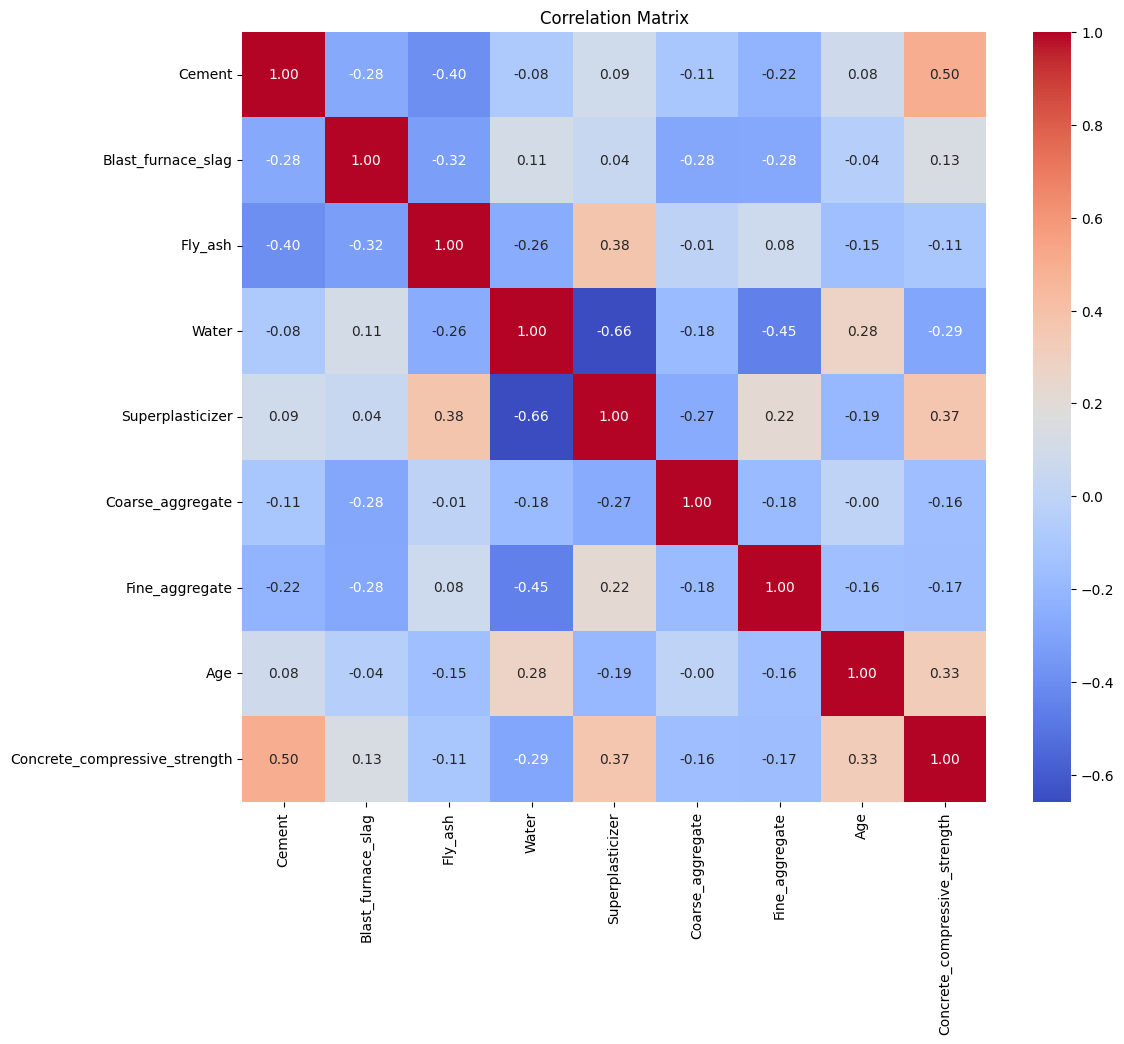

In [34]:
#correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


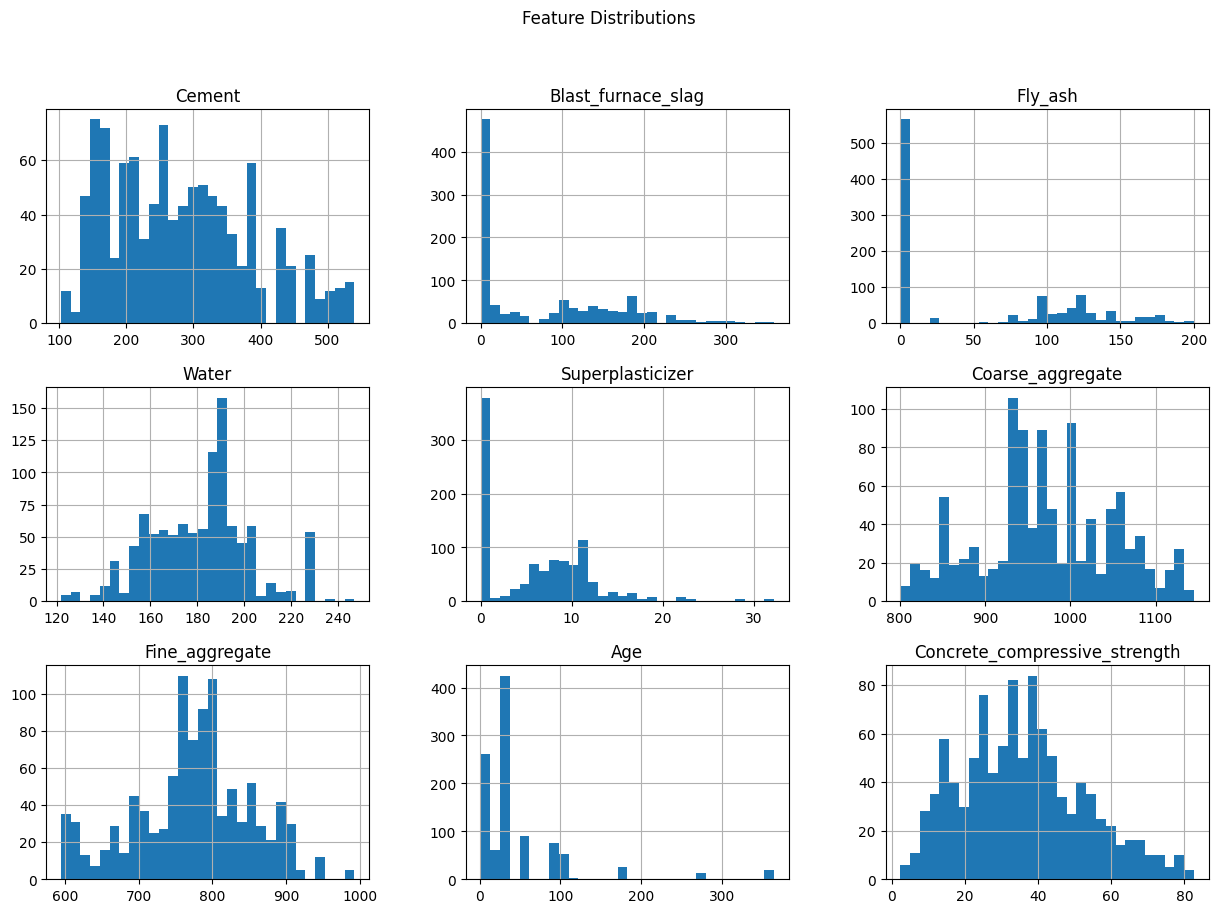

In [35]:
#feature distribution
data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()

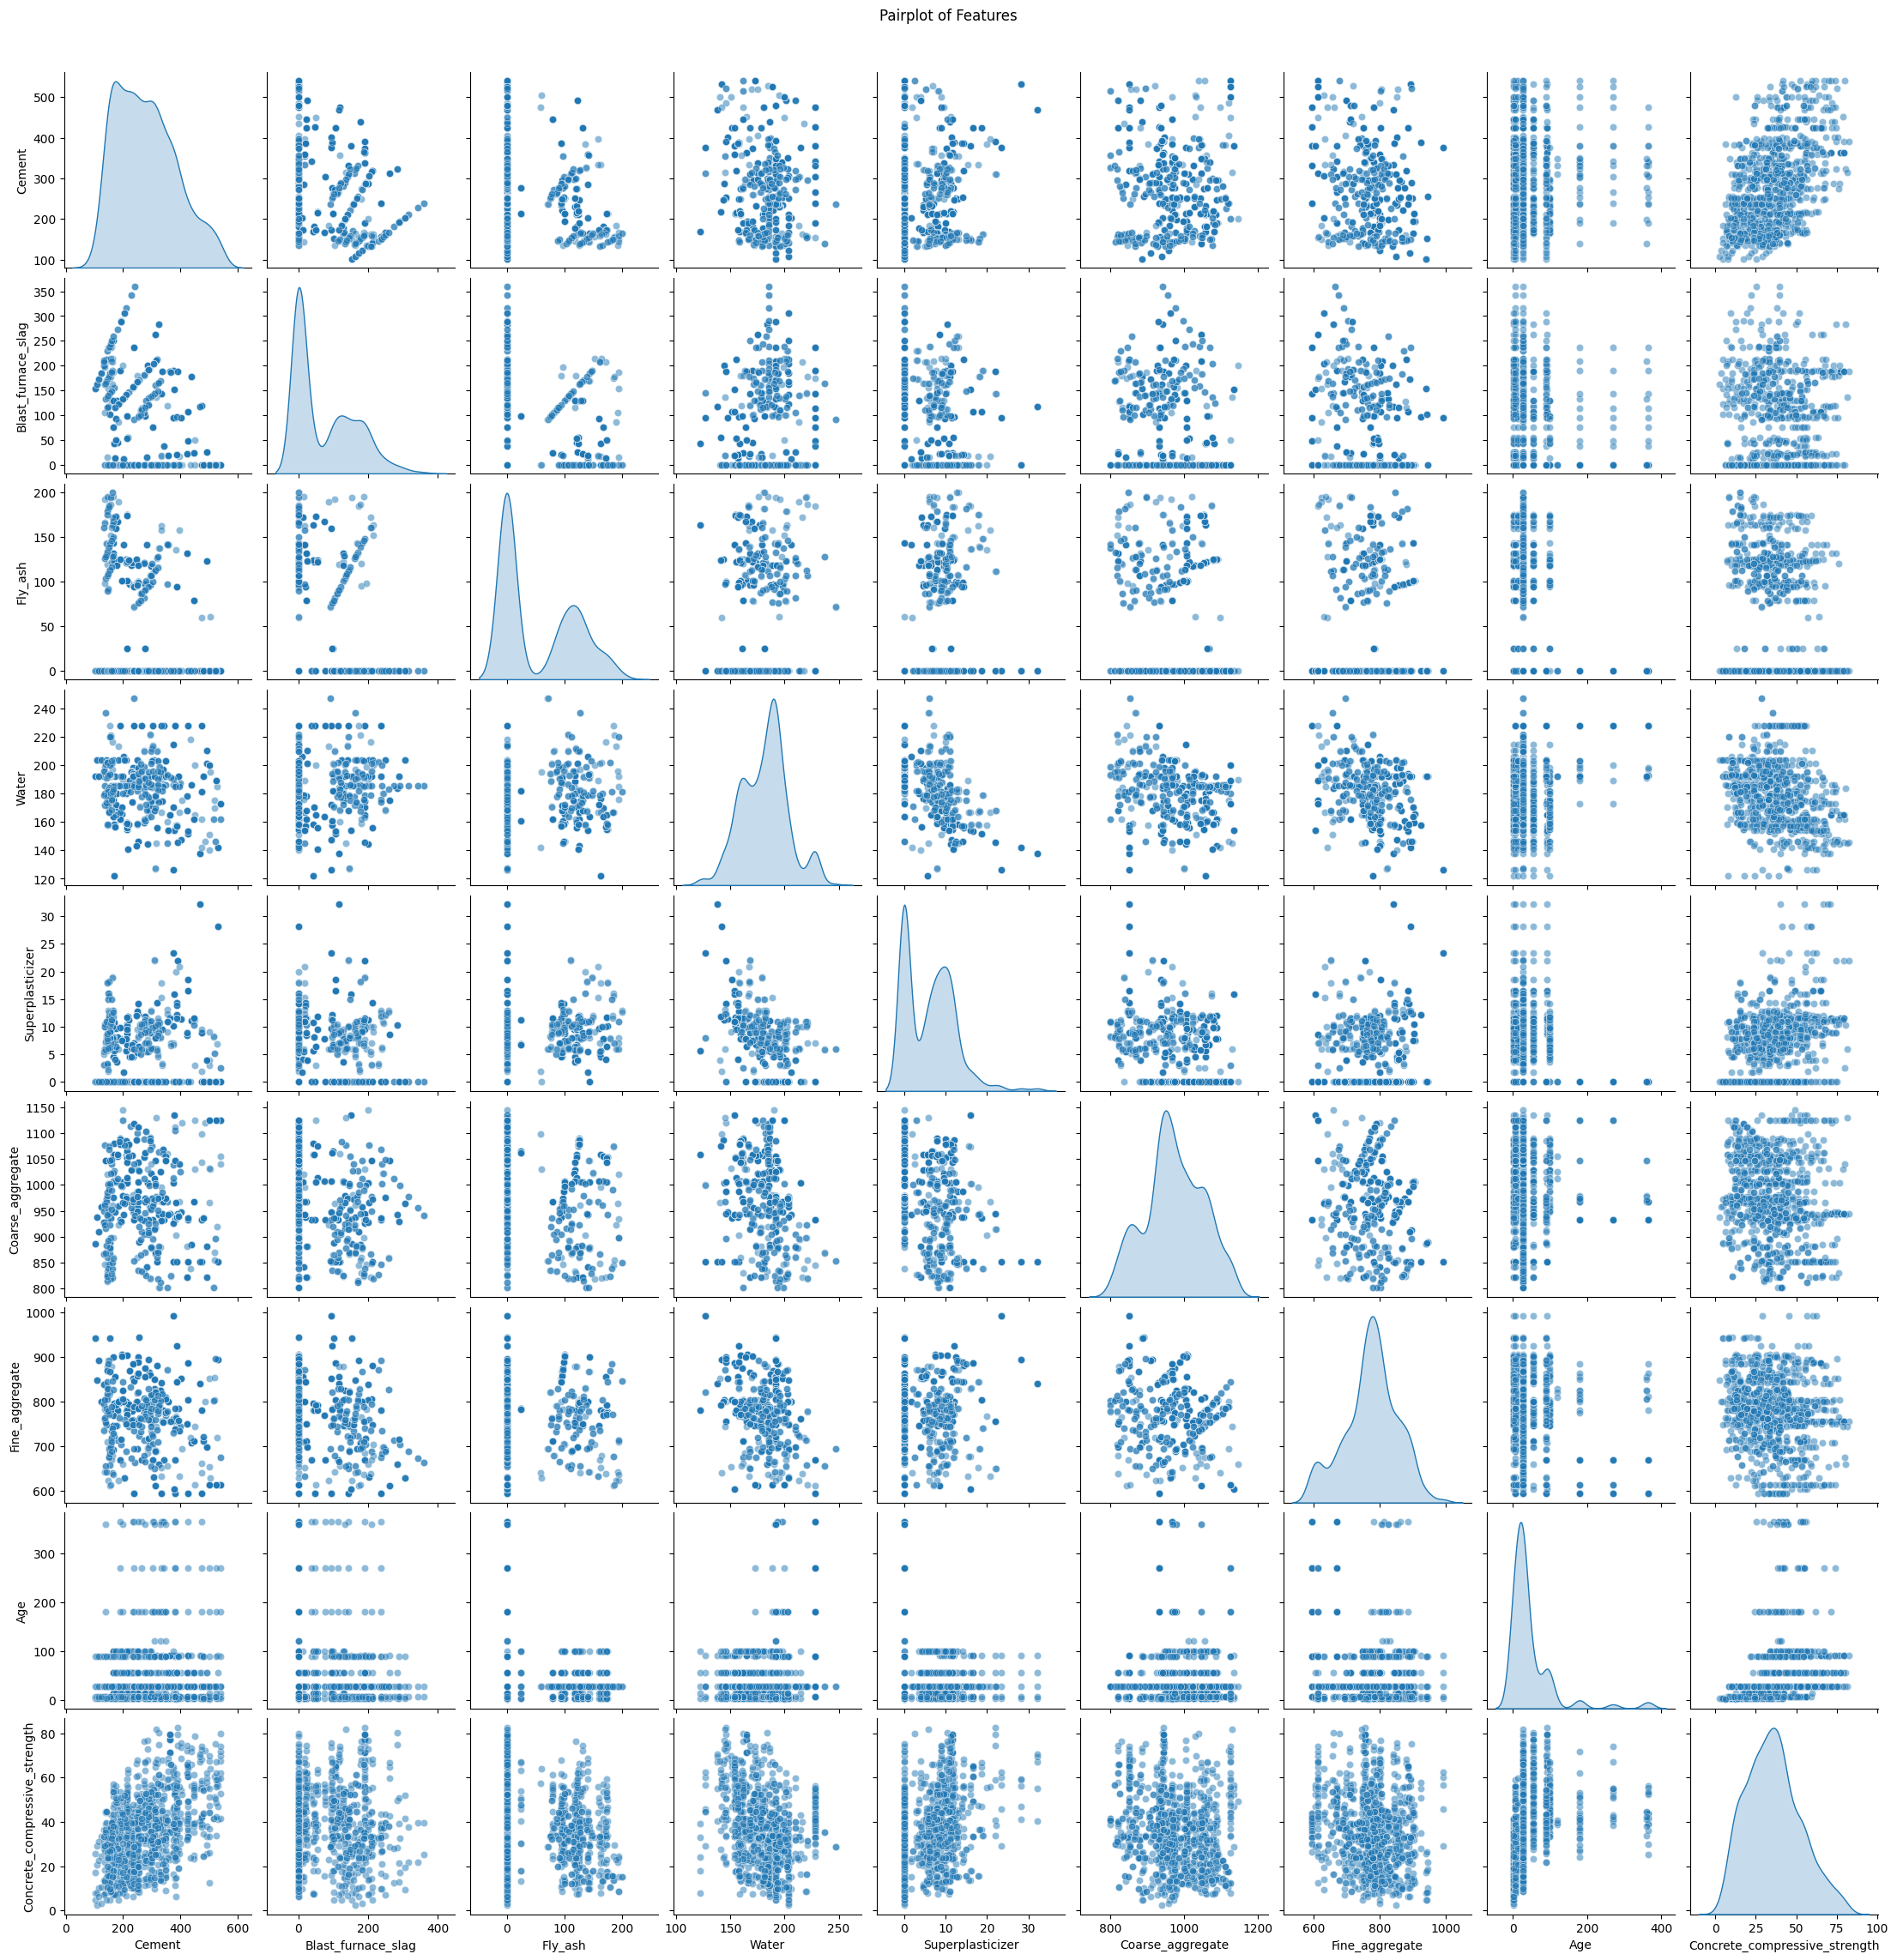

In [36]:
#pairplot for feature relationships
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

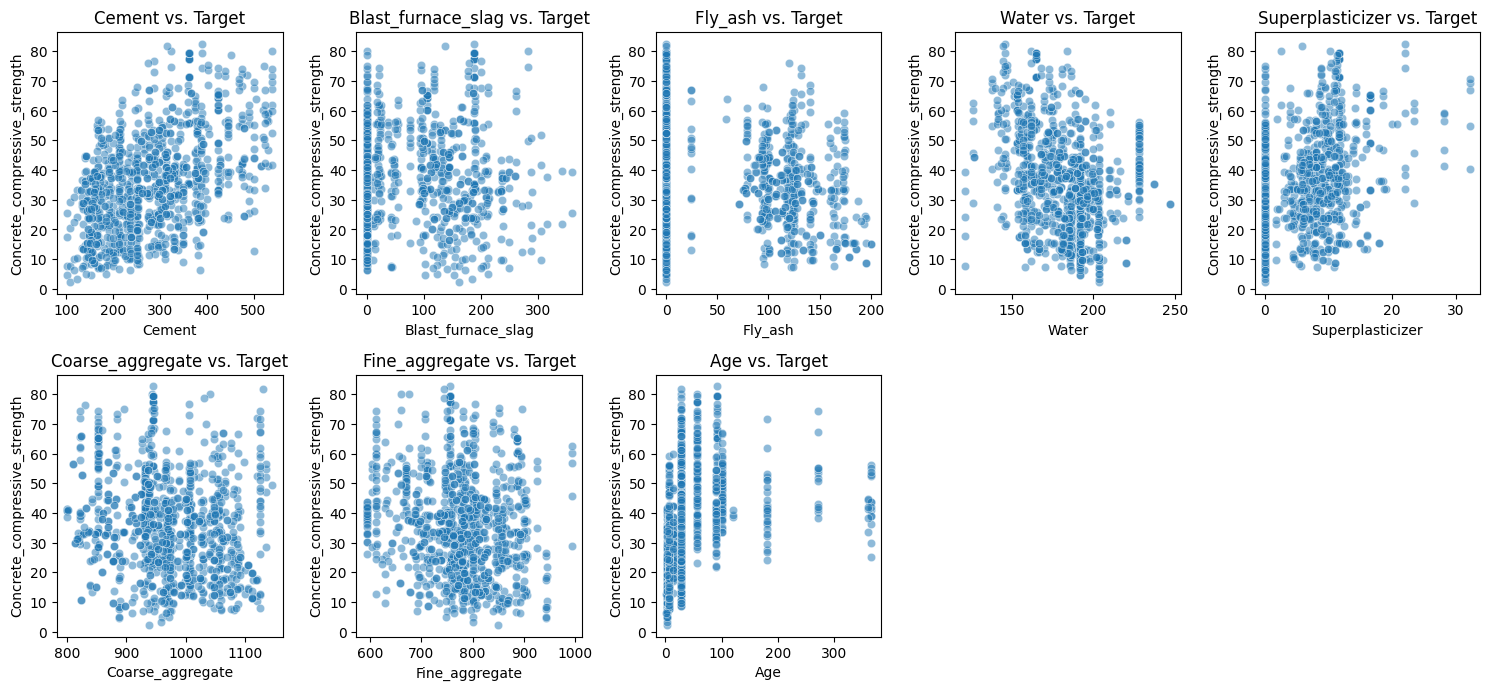

In [39]:
#feature vs. target variable
target = 'Concrete_compressive_strength'
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(3, 5, i+1)
    sns.scatterplot(x=data[col], y=data[target], alpha=0.5)
    plt.title(f'{col} vs. Target')
plt.tight_layout()
plt.show()


# Train-Test data split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Neural Network Architecture

In [20]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])


In [26]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [28]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
21/21 [==============================] - 0s 7ms/step - loss: 8.6526 - mae: 2.1292 - val_loss: 27.3617 - val_mae: 3.7419
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 8.0717 - mae: 2.0076 - val_loss: 25.2942 - val_mae: 3.5675
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 6.4510 - mae: 1.7771 - val_loss: 25.5460 - val_mae: 3.4722
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 6.8438 - mae: 1.8192 - val_loss: 27.2084 - val_mae: 3.5844
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 6.7036 - mae: 1.8387 - val_loss: 25.9699 - val_mae: 3.5178
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 6.8865 - mae: 1.8198 - val_loss: 25.5332 - val_mae: 3.4801
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 6.3099 - mae: 1.7483 - val_loss: 25.4044 - val_mae: 3.4420
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 6.3

In [23]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

7/7 [==============================] - 0s 2ms/step
Mean Squared Error: 36.69


In [17]:
import matplotlib.pyplot as plt

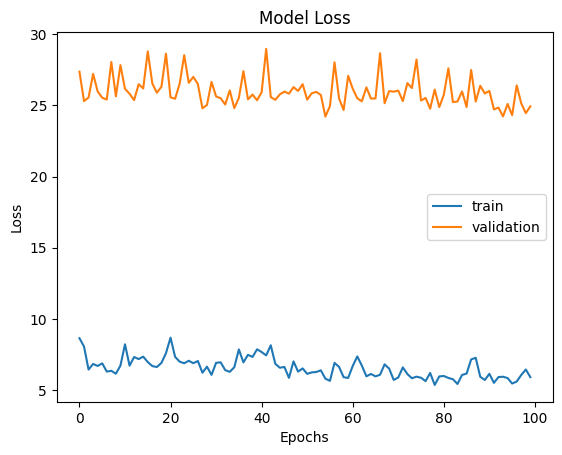

In [40]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

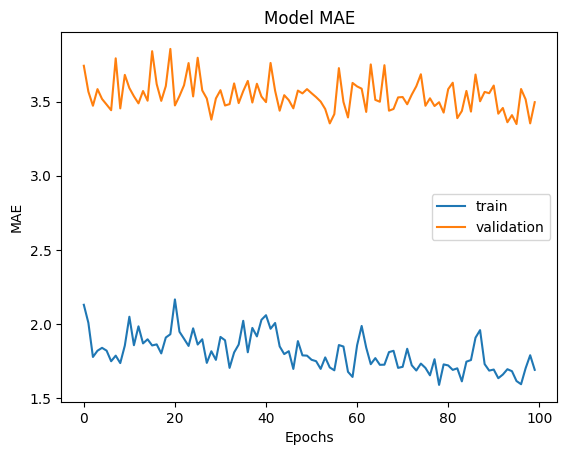

In [41]:
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='validation')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Observations

The evaluation of the neural network model reveals a Mean Absolute Error (MAE) of 36.69. Given the nature of concrete compressive strength prediction, where precision is critical, this level of error suggests that the current neural network model may not be sufficiently effective. The MAE of 36.69 indicates that the model’s predictions deviate from the actual values by an average of 36 units, which could be substantial depending on the scale and requirements of the application. Thus, the neural network architecture constructed above seems to perform poorly on the given dataset and some alternative regression techniques must be used to improve the accuracy further.